## Table of Contents
***
### [Management Summary](#summary)
- [Analytical Approach](#approach)
- [Key Insights](#key)

### [Problem Statement](#problem)
 - [Libraries](#library)
 - [Dataset](#data)
 - [Exploratory Data Analysis](#explore)
 - [Data Cleaning](#cleaning)
 - [Feature Engineering](#feature)

### [Univariate Analysis](#univariate)
 - [Distance](#distance)
 - [Vendor](#vendor)
 - [Passengers](#passenger)
 - [Rate Code](#rate)   
 - [Store and forward flag](#flag)
 - [Speed](#speed)
 - [Trip Duration](#duration)
 - [Trips per Hour](#hour_trip)
 - [Trips per Time of Day](#timeday_trip)     
 - [Trips per Day](#day_trip)
 - [Trips per Month](#month_trip)
 - [Trips per Yeaar](#year_trip)
 - [Payment Method](#payment)
 - [Total Amount](#amount)

### [Bivariate analysis](#bivariate)
 - [Trip Duration, Trip Distance per Hour](#hour_du_di)
 - [Trip Duration, Trip Distance per Time of Day](#timeday_du_di)
 - [Trip Duration, Trip Distance per Day](#day_du_di)
 - [Passengers per Tip Amount](#passenger_tip)
 - [Trip Duration and Distance](#du_di)

### [Correlation Analysis](#corr)
 - [Heatmap](#heatmap)


<a id=summary></a>
# Management Summary

<a id=approach></a>
## Analytical Approach

To obtain valuable insights, I decided to categorize the dataset into two distinct groups:

1- Airport Rides: This category includes rides that are specifically related to airports. These rides typically involve transportation to or from airports, such as trips to catch flights or journeys from airports to the city.

2- City Rides: This category encompasses rides that occur within the city limits. These rides primarily involve transportation within the urban areas, such as commuting to work, running errands, or exploring the city's attractions.

By dividing the dataset into these two categories, I aimed to analyze and compare various aspects, such as trip duration, trip distance, and other relevant features, in order to gain meaningful insights specific to each category.


<a id=key></a>
## Key Insights

* A significant majority of the rides are completed within a range of 0-8 kilometers.


* the number of trips taken by vendor 2 (VeriFone Inc) is more than six times the number of trips taken by vendor 1 (Creative Mobile Technologies, LLC).


* The single passenger rides were highest.


* Less than 1% of the trips were found to be stored before being forwarded.


* Mostly trips are done at a speed range of 10-20 km/h.


* The majority of trips took between 6 to 12 minutes to complete.


* There is a sudden rise in the pickup hours from 5AM and it continued till 8AM. This is may be due to early morning office hours


* Evening between 5PM and 7PM seem to be the busiest hours and that makes sense as this is the time when people return from their offices.


* The usage of taxis experienced a decrease in January, which is to be expected as many individuals take trips outside the city during the New Year's holiday and do not commute to the office. A similar pattern is observed during the summer season due to high travel demand.


* There is not a substantial difference in taxi usage between the period before and after the Corona pandemic in urban trips, as people were still allowed to commute within the city during that time.


* Payment with credit cards is more commonly used among passengers.


* It is noticeable that people tend to use taxis when the total fare amount is approximately less than $17.


* the trip duration reaches its maximum around 4 pm, which can be attributed to increased traffic on the roads during that time. On the other hand, the trip duration is the lowest around 6 am, likely because the streets are less busy during early morning hours.


* We observe that the trip distance is highest around 4 am. This finding suggests that people are likely undertaking longer journeys, potentially for outstation trips, and starting their travels early in the morning.


* the tip amount tends to be higher when there is only one passenger in the trip. This is evident because the majority of taxi rides consist of just one passenger.


* There exists a direct relationship between the duration and distance of rides. This means that as the distance of a ride increases, the duration of the ride also tends to increase. Similarly, when the distance of a ride is shorter, the duration of the ride is typically shorter as well. This relationship can be attributed to various factors such as traffic conditions, speed limits, and route choices, where longer distances often require more time to travel.

<a id=problem></a>
# Problem Statement

<a id=library></a>
## Import libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('fivethirtyeight')


<a id=data></a>
## Import Dataset

In [2]:
#import the data from a csv file.

df = pd.read_csv('Yellow_Taxi_Assignment.csv')

<a id=explore></a>
## Exploratory Data Analysis

We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


In [4]:
# Lets see shape of dataset

df.shape

(304978, 19)

In [5]:
# duplicates

td =sum(df.duplicated())
print( f"There are/is {td} duplicate row/s.")

There are/is 0 duplicate row/s.


In [6]:
# Lets add trip_id to dataset

df['id'] = range(1, len(df) + 1)

Lets divide dataset into 2 categories: taxi_airport and taxi_city.
 it help us to obtain meaningful insights, as we know the duration and distance of trip to airport is longer than urban trips. in this code I go deep dive into taxi_city and Icreate another code for investigating in taxi_airport.

New York is served by several airports,based on the research I have done the zone number for airport is:\
zone 132 = John F. Kennedy International Airport (JFK): Located in the borough of Queens, JFK is the primary international airport serving New York City.\
zone 138 = LaGuardia Airport (LGA): Also situated in Queens, LaGuardia primarily handles domestic flights and some international flights.\
zone 1 = Newark Liberty International Airport (EWR): Although technically located in Newark, New Jersey, Newark Airport serves the New York metropolitan area and is a major gateway to the region.

In [7]:
# Lets define dataframe for trips fram the airports and to the airports

to_airport = df.loc[df['DOLocationID'].isin([1,132,138])]
from_airport = df.loc[df['PULocationID'].isin([1,132,138])]

In [8]:
# Lets define dataframe taxi_airport & taxi_city

taxi_airport = pd.concat([to_airport, from_airport])
taxi_airport.drop_duplicates(inplace=True)
taxi_airport.set_index('id', inplace=True)
df.set_index('id', inplace=True)
taxi_city = df.loc[df.index.difference(taxi_airport.index)]

taxi_city.shape

(283109, 19)

In [9]:
# Rename taxi_airport to df for rest of analysis

df = taxi_city

<a id=cleaning></a>
## Data Cleaning 

In [10]:
# Lets convert column names to lowercase

df.columns = df.columns.str.lower() 
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [11]:
# Lets change column name's format

df.rename(columns={'vendorid':'vendor_id','ratecodeid':'rate_code_id','pulocationid':'pu_location_id','dolocationid':'do_location_id'}, inplace=True)
# 
df.columns

Index(['vendor_id', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'rate_code_id',
       'store_and_fwd_flag', 'pu_location_id', 'do_location_id',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [12]:
# Checking for missing values

for col in df.columns:
    missing = df[col].isna().sum()
    print(f"Missing values in {col}: {missing}")

Missing values in vendor_id: 0
Missing values in tpep_pickup_datetime: 0
Missing values in tpep_dropoff_datetime: 0
Missing values in passenger_count: 9188
Missing values in trip_distance: 0
Missing values in rate_code_id: 9188
Missing values in store_and_fwd_flag: 9188
Missing values in pu_location_id: 0
Missing values in do_location_id: 0
Missing values in payment_type: 0
Missing values in fare_amount: 0
Missing values in extra: 0
Missing values in mta_tax: 0
Missing values in tip_amount: 0
Missing values in tolls_amount: 0
Missing values in improvement_surcharge: 0
Missing values in total_amount: 0
Missing values in congestion_surcharge: 67685
Missing values in airport_fee: 186412


In [13]:
# Lets see decription of dataset

df.describe()

,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,283109.000000,273921.000000,283109.000000,273921.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,283109.000000,215424.000000,96697.000000
mean,1.670717,1.474118,3.303616,1.117724,165.443970,162.439587,1.238043,11.407970,0.902341,0.493983,1.891130,0.121698,0.312265,16.356005,2.309809,0.004615
std,0.517118,1.107118,303.550827,3.070070,68.095897,70.869519,0.528448,9.308908,1.150259,0.069623,2.063678,0.991740,0.108591,10.792789,0.699683,0.076449
min,1.000000,0.000000,-16.860000,1.000000,3.000000,2.000000,0.000000,-197.000000,-6.000000,-0.500000,-5.320000,-13.750000,-1.000000,-198.550000,-2.500000,-1.250000
25%,1.000000,1.000000,1.000000,1.000000,113.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.560000,2.500000,0.000000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.850000,0.000000,0.300000,13.910000,2.500000,0.000000
75%,2.000000,2.000000,2.760000,1.000000,234.000000,234.000000,2.000000,13.500000,1.000000,0.500000,2.760000,0.000000,0.300000,18.960000,2.500000,0.000000
max,6.000000,6.000000,109814.680000,99.000000,265.000000,265.000000,5.000000,455.000000,8.250000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000


Some insights from the above summary:

1.    Vendor id has a minimum value of 1 and a maximum value of 6 which doesn't make sense as we saw in data dictionary there are two vendor ids 1 and 2. we will drop invalid data.
2.    Passenger count has a minimum of 0 which means either it is an error entered or the drivers deliberately entered 0 to complete a target number of rides.
3.    Trip distance has a minimum value of -16.86 which doesn't make sense as we know distance should not be a negative value. we will drop invalid data.
4.    Rate code ID has a minimum value of 1 and a maximum value of 99 which doesn't make sense as we saw in data dictionary there are only six rate code ids.
5. There are negative value in all tip and total amount which doesn't make sense.
6. The minimal fare_amount is negative. As this does not seem to be realistic I will drop them from the dataset.
7. payment_type has a minimum value of 0 which doesn't make sense as we saw in data dictionary it can get value range between 1 and 6. we will drop invalid data.

In [14]:
# Lets check the values in vendor_id

df['vendor_id'].value_counts()

2    185905
1     96225
6       521
4       456
5         2
Name: vendor_id, dtype: int64

We know there are two vendor ids 1 and 2 in data dictionary. so we need to drop other vendor ids.

In [15]:
# Lets clean values in vendor_id

df = df.drop(df[df.vendor_id.isin([4, 5, 6])].index)

In [16]:
# Lets check again the values in vendor_id 

df['vendor_id'].value_counts()

2    185905
1     96225
Name: vendor_id, dtype: int64

In [17]:
# Lets check the values in rate_code_id

df['rate_code_id'].value_counts() 

1.0     271006
5.0       1215
2.0        821
99.0       267
3.0         86
4.0         69
6.0          1
Name: rate_code_id, dtype: int64

We saw in data dictionary there are only six rate code ids from 1 to 6. so the value 99 is invalid here.

In [18]:
# Lets clean values in rate_code_id

df = df[df['rate_code_id'] != 99]
df['rate_code_id'].value_counts() 

1.0    271006
5.0      1215
2.0       821
3.0        86
4.0        69
6.0         1
Name: rate_code_id, dtype: int64

In [19]:
# Lets Check zeros in numeric columns

def check_for_zeros(df):
    for col in df.columns:
        zeros = df[df[col] == 0].shape[0]
        print(f"Zeros in {col}:{zeros}")
        
check_for_zeros(df)

Zeros in vendor_id:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:5164
Zeros in trip_distance:3507
Zeros in rate_code_id:0
Zeros in store_and_fwd_flag:0
Zeros in pu_location_id:0
Zeros in do_location_id:0
Zeros in payment_type:8665
Zeros in fare_amount:113
Zeros in extra:122125
Zeros in mta_tax:1353
Zeros in tip_amount:84351
Zeros in tolls_amount:276813
Zeros in improvement_surcharge:124
Zeros in total_amount:73
Zeros in congestion_surcharge:14389
Zeros in airport_fee:96077


passenger_count, trip_distance, payment_type, payment_type, far_amount, total_amount and other columns all contain zero.


Without distance, we can't determine fare amount. There isn't much of a choice but to drop these, however, total_amount can be corrected by simply adding all of the charge column values together, so I'll keep and fix these rows.


The reasons for 0 mile distance can be:
* The dropoff location couldn’t be tracked.
* The driver deliberately took this ride to complete a target ride number.
* The passengers canceled the trip.

Passenger count is a driver entered value. Since the trip is not possible without passengers. It is evident that the driver forgot to enter the value for the trips with 0 passenger count. Lets analyze the passenger count distribution further to make it consistent for further analysis


In [20]:
df.passenger_count.describe()

count    273198.000000
mean          1.475318
std           1.108256
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [21]:
df.passenger_count.value_counts()

1.0    199539
2.0     39471
3.0     10641
5.0      8318
6.0      5400
0.0      5164
4.0      4665
Name: passenger_count, dtype: int64

In [22]:
# Dropping rows with negative or 0 values in columns where it is not allowed

df = df[df['passenger_count'] > 0]
df = df[df['trip_distance'] > 0]
df = df[df['fare_amount'] > 0]
df = df[df['payment_type'] > 0]

check_for_zeros(df)

Zeros in vendor_id:0
Zeros in tpep_pickup_datetime:0
Zeros in tpep_dropoff_datetime:0
Zeros in passenger_count:0
Zeros in trip_distance:0
Zeros in rate_code_id:0
Zeros in store_and_fwd_flag:0
Zeros in pu_location_id:0
Zeros in do_location_id:0
Zeros in payment_type:0
Zeros in fare_amount:0
Zeros in extra:111982
Zeros in mta_tax:480
Zeros in tip_amount:76490
Zeros in tolls_amount:260667
Zeros in improvement_surcharge:20
Zeros in total_amount:0
Zeros in congestion_surcharge:12076
Zeros in airport_fee:92309


After dropping rows with zero values in other columns, there remains no zeros in total_amount, so no corrections necessary!

In [23]:
# Lets convert trip_distance from mile to Km

df['trip_distance']= df['trip_distance'] * 1.60934

In [24]:
# Lets check dataset again

df.describe()

,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,206676.000000,92648.000000
mean,1.666927,1.507182,3.628829,1.011184,166.008085,163.054456,1.268880,10.876861,0.899852,0.499117,1.896171,0.082772,0.314856,15.846517,2.353927,0.004574
std,0.471313,1.103230,3.744788,0.190725,67.627157,70.546360,0.461336,7.661746,1.133213,0.022174,1.983506,0.815427,0.101000,9.212195,0.586387,0.075474
min,1.000000,1.000000,0.016093,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.310000,0.000000,0.000000
25%,1.000000,1.000000,1.609340,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,10.560000,2.500000,0.000000
50%,2.000000,1.000000,2.574944,1.000000,163.000000,162.000000,1.000000,9.000000,0.500000,0.500000,1.860000,0.000000,0.300000,13.800000,2.500000,0.000000
75%,2.000000,2.000000,4.345218,1.000000,234.000000,234.000000,2.000000,13.000000,1.000000,0.500000,2.760000,0.000000,0.300000,18.360000,2.500000,0.000000
max,2.000000,6.000000,277.160535,5.000000,265.000000,265.000000,4.000000,434.500000,7.500000,2.540000,115.560000,96.550000,1.000000,561.490000,2.750000,1.250000


it seems dataset was cleaned and there is no negative amount in total amount and fare amount but the maximum of trip_distance is 277 Km and it doesn't make sense.

count    263939.000000
mean          3.628829
std           3.744788
min           0.016093
25%           1.609340
50%           2.574944
75%           4.345218
max         277.160535
Name: trip_distance, dtype: float64

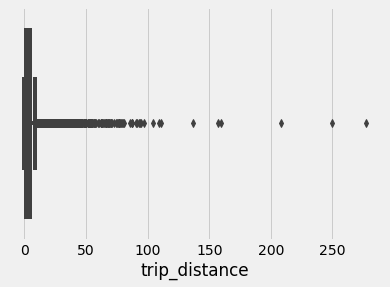

In [25]:
# Lets take a look at trip_distance

sns.boxplot(df.trip_distance)
df.trip_distance.describe()

There are some trips with over 100 km distance.\
mean distance travelled is approx 3.62 kms.\
standard deviation is 3.37 which shows that most of the trips are limited to the range of 1-7 kms.\
A max trip_distance of 277 Km is not a realistic trip distance.\
clear indication that outliers are present in the data and we should remove it,lets keep them now and after creating some features I will remove all outlier from dataset.

In [26]:
# Lets check the number of null values in dataset

df.isnull().sum()

vendor_id                     0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
rate_code_id                  0
store_and_fwd_flag            0
pu_location_id                0
do_location_id                0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      57263
airport_fee              171291
dtype: int64

<a id=feature></a>
## Feature Engineering

In [27]:
# Lets check the datatypes and non-null count in dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263939 entries, 1 to 304978
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vendor_id              263939 non-null  int64  
 1   tpep_pickup_datetime   263939 non-null  object 
 2   tpep_dropoff_datetime  263939 non-null  object 
 3   passenger_count        263939 non-null  float64
 4   trip_distance          263939 non-null  float64
 5   rate_code_id           263939 non-null  float64
 6   store_and_fwd_flag     263939 non-null  object 
 7   pu_location_id         263939 non-null  int64  
 8   do_location_id         263939 non-null  int64  
 9   payment_type           263939 non-null  int64  
 10  fare_amount            263939 non-null  float64
 11  extra                  263939 non-null  float64
 12  mta_tax                263939 non-null  float64
 13  tip_amount             263939 non-null  float64
 14  tolls_amount           263939 non-nu

In [28]:
# Lets first convert the pickup time and dropoff time to datetime from object type

df.tpep_pickup_datetime=pd.to_datetime(df.tpep_pickup_datetime)
df.tpep_dropoff_datetime=pd.to_datetime(df.tpep_dropoff_datetime)
print('data type tpep_pickup_datetime is:', df.tpep_pickup_datetime.dtype)
print('data type tpep_dropoff_datetime is:', df.tpep_dropoff_datetime.dtype)

data type tpep_pickup_datetime is: datetime64[ns]
data type tpep_dropoff_datetime is: datetime64[ns]


In [29]:
# Lets create new columns from pickup time to get more clear insights :

df['hour']=df['tpep_pickup_datetime'].dt.hour
df['day']=df['tpep_pickup_datetime'].dt.day_name()
df['month']=df['tpep_pickup_datetime'].dt.month
df['year']=df['tpep_pickup_datetime'].dt.year
df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df['trip_duration']=(df.duration.dt.seconds)/3600
df['speed'] = df['trip_distance'] /df['trip_duration']
df.head()

,vendor_id,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,...,total_amount,congestion_surcharge,airport_fee,hour,day,month,year,duration,trip_duration,speed
id,,,,,,,,,,,,,,,,,,,,,
1,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.852950,1.0,N,142,163,1,...,5.59,NaN,NaN,12,Monday,1,2018,00:02:04,0.034444,24.763070
2,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.689807,1.0,N,140,236,1,...,7.82,NaN,NaN,12,Monday,1,2018,00:04:41,0.078056,21.648773
3,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,2.945092,1.0,N,211,158,1,...,12.42,NaN,NaN,1,Monday,1,2018,00:11:04,0.184444,15.967367
4,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,3.701482,1.0,N,249,4,2,...,10.80,NaN,NaN,8,Monday,1,2018,00:09:46,0.162778,22.739480
5,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,4.924580,1.0,N,186,142,1,...,14.80,NaN,NaN,1,Monday,1,2018,00:13:57,0.232500,21.180991


 We have created the following features:

- day and dropoff_day which will contain the name of the day on which the ride was taken.
- day_no and dropoff_day_no which will contain the day number instead of characters with Monday=0 and Sunday=6.
- hour and dropoff_hour with an hour of the day in the 24-hour format.
- month and dropoff_month with month number with January=1 and December=12
- trip_duration is the time beetween drop off and pick up
- trip_duration calculate based on hour
- speed (Km/h)

I have defined a function that lets us determine what time of the day the ride was taken. I have created 4 time zones ‘Morning’ (from 6:00 am to 11:59 pm), ‘Afternoon’ (from 12 noon to 3:59 pm), ‘Evening’ (from 4:00 pm to 9:59 pm), and ‘Late Night’ (from 10:00 pm to 5:59 am)

In [30]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

Now let us apply this function and create new columns in the dataset.

In [31]:
df['time_of_day']=df['hour'].apply(time_of_day)

The only dropoff information we needed to calculate the length of the trip was tpep_dropoff_datetime .\
Now, the datetime columns can be dropped entirely!

In [32]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [33]:
df.reset_index(inplace=True)

In [34]:
df.describe()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,pu_location_id,do_location_id,payment_type,fare_amount,extra,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,month,year,duration,trip_duration,speed
count,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,263939.000000,...,263939.000000,263939.000000,206676.000000,92648.000000,263939.000000,263939.000000,263939.000000,263939,263939.000000,2.639390e+05
mean,149729.911767,1.666927,1.507182,3.628829,1.011184,166.008085,163.054456,1.268880,10.876861,0.899852,...,0.314856,15.846517,2.353927,0.004574,13.974157,6.380330,2020.005630,0 days 00:14:53.752230,0.248355,inf
std,88186.301458,0.471313,1.103230,3.744788,0.190725,67.627157,70.546360,0.461336,7.661746,1.133213,...,0.101000,9.212195,0.586387,0.075474,5.708313,3.504135,1.455591,0 days 01:00:33.506717,1.010299,NaN
min,1.000000,1.000000,1.000000,0.016093,1.000000,3.000000,3.000000,1.000000,0.010000,0.000000,...,0.000000,0.310000,0.000000,0.000000,0.000000,1.000000,2018.000000,-1 days +23:15:52,0.000000,1.315081e-02
25%,72854.500000,1.000000,1.000000,1.609340,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,...,0.300000,10.560000,2.500000,0.000000,10.000000,3.000000,2019.000000,0 days 00:06:21,0.105833,1.237954e+01
50%,148667.000000,2.000000,1.000000,2.574944,1.000000,163.000000,162.000000,1.000000,9.000000,0.500000,...,0.300000,13.800000,2.500000,0.000000,15.000000,6.000000,2020.000000,0 days 00:10:16,0.171111,1.626915e+01
75%,225909.500000,2.000000,2.000000,4.345218,1.000000,234.000000,234.000000,2.000000,13.000000,1.000000,...,0.300000,18.360000,2.500000,0.000000,18.000000,9.000000,2021.000000,0 days 00:16:01,0.266944,2.126101e+01
max,304978.000000,2.000000,6.000000,277.160535,5.000000,265.000000,265.000000,4.000000,434.500000,7.500000,...,1.000000,561.490000,2.750000,1.250000,23.000000,12.000000,2023.000000,0 days 23:59:52,23.997778,inf


 Now that the dates have been broken down properly, and we have our trip duration sorted out, we can clean these new features!
 
 First, any trips with a duration of 0 need to be dropped. These trips won't be useful, and are certaintly caused by a data entry error.these rows affected on speed calculation.\
 Second, we can investigate what years are available in this dataset, how much of the dataset each year makes up, and begin investigating whether we should keep all years, or only specific years by visualizing trends in fare amounts when compared to trip duration and distance.\
 For short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.lets keep them.\
I remove outlier from dataset.

In [35]:
df1=df[['id','speed','trip_distance','trip_duration']]
df1.shape

(263939, 4)

In [36]:
# Lets define a function to remove outlier

def remove_outliers(data):

        '''
        Remove outliers from the dataset
        
        Parameters:
        - data : Feature set / dataframe
        '''
        first_quartile = data.quantile(0.25)
        third_quartile = data.quantile(0.75)
        interquartile_range = third_quartile - first_quartile
        #print(interquartile_range)
        print('Before outlier removal, dataset dimension was :',data.shape)
        data = data[~((data < (first_quartile - 3 * interquartile_range)) |(data > (third_quartile + 3 * interquartile_range))).any(axis=1)]
        print('After outlier removal, dataset dimension was :',data.shape)
        return data

In [37]:
df1 = remove_outliers(df1)

Before outlier removal, dataset dimension was : (263939, 4)
After outlier removal, dataset dimension was : (254780, 4)


In [38]:
# Lets keep only id column

df1 = df1.drop(['trip_duration', 'speed','trip_distance'], axis=1)

In [39]:
df = pd.merge(df1, df, on=['id'], how='left')
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,...,congestion_surcharge,airport_fee,hour,day,month,year,duration,trip_duration,speed,time_of_day
0,1,2,1.0,0.852950,1.0,N,142,163,1,3.5,...,NaN,NaN,12,Monday,1,2018,00:02:04,0.034444,24.763070,Afternoon
1,2,2,1.0,1.689807,1.0,N,140,236,1,6.0,...,NaN,NaN,12,Monday,1,2018,00:04:41,0.078056,21.648773,Afternoon
2,3,2,4.0,2.945092,1.0,N,211,158,1,9.5,...,NaN,NaN,1,Monday,1,2018,00:11:04,0.184444,15.967367,Late night
3,4,1,1.0,3.701482,1.0,N,249,4,2,10.0,...,NaN,NaN,8,Monday,1,2018,00:09:46,0.162778,22.739480,Morning
4,5,2,1.0,4.924580,1.0,N,186,142,1,12.5,...,NaN,NaN,1,Monday,1,2018,00:13:57,0.232500,21.180991,Late night


count    254780.000000
mean          3.181807
std           2.284677
min           0.016093
25%           1.593247
50%           2.526664
75%           4.055537
max          12.552852
Name: trip_distance, dtype: float64

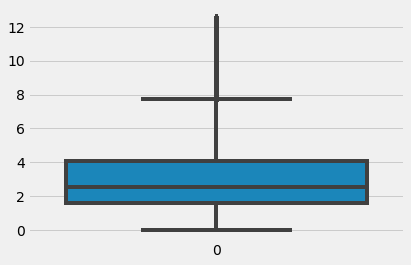

In [40]:
# Let's now have a look on the distribution of the distance

sns.boxplot(data = df.trip_distance)
df.trip_distance.describe()

count    254780.000000
mean          0.193420
std           0.119508
min           0.000556
25%           0.104167
50%           0.166667
75%           0.255278
max           0.749444
Name: trip_duration, dtype: float64

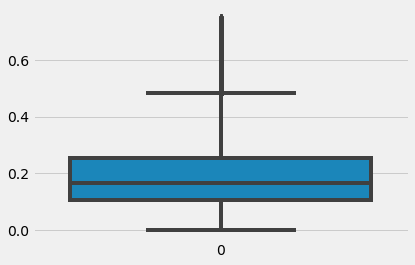

In [41]:
# Lets check trip_duration 

sns.boxplot(data = df.trip_duration)
df.trip_duration.describe()

Mean and median are not same which shows that trip duration distribution is skewed towards right.

count    254780.000000
mean         17.164518
std           7.001540
min           0.084210
25%          12.296081
50%          16.063652
75%          20.755180
max          47.895021
Name: speed, dtype: float64

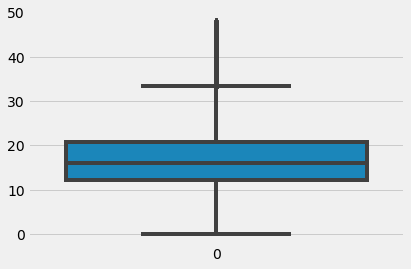

In [42]:
# Lets check speed 

sns.boxplot(data = df.speed)
df.speed.describe()

In [43]:
# Lets check years

list_of_years = df.year.unique()
print(list_of_years)

[2018 2019 2020 2021 2022 2023]


In [44]:
# Lets see the distribution of year(%)

for year in list_of_years:
    year_amount = df[df['year'] == year].shape[0]
    total_amount = df.shape[0]
    
    print(f"{year} makes up {round((year_amount / total_amount) * 100)} % of the dataset")

2018 makes up 21 % of the dataset
2019 makes up 20 % of the dataset
2020 makes up 19 % of the dataset
2021 makes up 19 % of the dataset
2022 makes up 19 % of the dataset
2023 makes up 2 % of the dataset


it seems we can keep all years but it's better to remove data of 2023.

In [45]:
# Lets remove the year 2023

df= df[df['year'] != 2023]
list_of_years = df.year.unique()
print(list_of_years)

[2018 2019 2020 2021 2022]


Lets Calculate total amounts and drop rows whose values don't "add up"...

In [46]:
fare = df['fare_amount'].values
extra = np.add(fare, df['extra'].values)
mta_tax = np.add(extra, df['mta_tax'].values)
tip_amount = np.add(mta_tax, df['tip_amount'].values)
imp_surcharge = np.add(tip_amount, df['improvement_surcharge'].values)
calculated_total_amount = np.add(imp_surcharge, df['tolls_amount'].values)

df['calculated_total_amount'] = pd.Series(calculated_total_amount)
# validate calculated total by manually adding all relevant columns and comparing to the calculated column
df[{'calculated_total_amount', 'total_amount'}].head()


,total_amount,calculated_total_amount
0,5.59,5.59
1,7.82,7.82
2,12.42,12.42
3,10.80,10.80
4,14.80,14.80


Lets drop anything that isn't correct

In [47]:
df = df[df['total_amount'] != df['calculated_total_amount']]
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,fare_amount,...,airport_fee,hour,day,month,year,duration,trip_duration,speed,time_of_day,calculated_total_amount
1,2,2,1.0,1.689807,1.0,N,140,236,1,6.0,...,NaN,12,Monday,1,2018,00:04:41,0.078056,21.648773,Afternoon,7.82
2,3,2,4.0,2.945092,1.0,N,211,158,1,9.5,...,NaN,1,Monday,1,2018,00:11:04,0.184444,15.967367,Late night,12.42
25,32,2,5.0,2.880719,1.0,N,158,246,1,9.0,...,NaN,1,Monday,1,2018,00:10:26,0.173889,16.566433,Late night,12.36
34,42,1,1.0,3.862416,1.0,N,162,113,1,10.5,...,NaN,18,Monday,1,2018,00:10:57,0.182500,21.163923,Evening,11.86
42,51,2,1.0,1.882928,1.0,N,90,113,1,6.0,...,NaN,22,Monday,1,2018,00:05:12,0.086667,21.726090,Late night,8.03


In [48]:
# Let's drop unnecessary columns

df.drop(['fare_amount', 'extra','mta_tax','tolls_amount','improvement_surcharge','congestion_surcharge','duration','calculated_total_amount','airport_fee'], axis=1, inplace=True)
df.head()

,id,vendor_id,passenger_count,trip_distance,rate_code_id,store_and_fwd_flag,pu_location_id,do_location_id,payment_type,tip_amount,total_amount,hour,day,month,year,trip_duration,speed,time_of_day
1,2,2,1.0,1.689807,1.0,N,140,236,1,1.02,7.82,12,Monday,1,2018,0.078056,21.648773,Afternoon
2,3,2,4.0,2.945092,1.0,N,211,158,1,1.62,12.42,1,Monday,1,2018,0.184444,15.967367,Late night
25,32,2,5.0,2.880719,1.0,N,158,246,1,2.06,12.36,1,Monday,1,2018,0.173889,16.566433,Late night
34,42,1,1.0,3.862416,1.0,N,162,113,1,0.56,11.86,18,Monday,1,2018,0.182500,21.163923,Evening
42,51,2,1.0,1.882928,1.0,N,90,113,1,0.73,8.03,22,Monday,1,2018,0.086667,21.726090,Late night


<a id=univariate></a>
# Univariate Analysis

<a id='distance'></a>
## Distance

In [49]:
df.trip_distance.describe()

count    146067.000000
mean          3.194733
std           2.245380
min           0.016093
25%           1.625433
50%           2.542757
75%           4.023350
max          12.552852
Name: trip_distance, dtype: float64

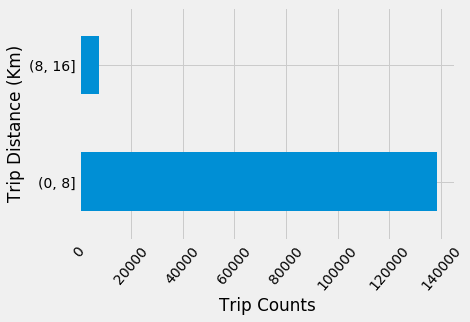

In [50]:
df.trip_distance.groupby(pd.cut(df.trip_distance, np.arange(0,17,8))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Distance (Km)')
plt.xticks(rotation=50)
plt.show()

From the above observation it is evident that most of the rides are completed between 0-4 Km.

<a id=vendor></a>
## Vendor

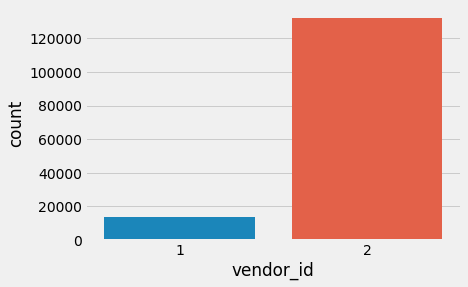

In [51]:
# Lets compare two vendors

sns.countplot(x='vendor_id',data=df)

We see that the number of trips taken by vendor 2 (VeriFone Inc) is more than vendor 1 (Creative Mobile Technologies, LLC).

<a id=passenger></a>
## Passengers

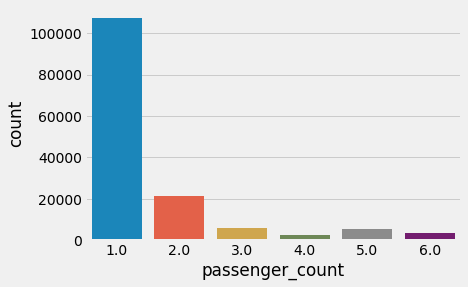

In [52]:
# Lets see the distribution of passenger_count

sns.countplot(x='passenger_count', data=df)

From above plot we can observe that the single passenger rides were highest.

<a id='rate'></a>
## Rate Code

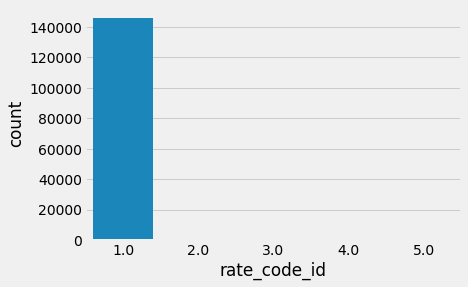

In [53]:
# Lets plot the rate_code_id

sns.countplot(x='rate_code_id', data=df)

We can clearly see that rate_code_id 1 i.e., standard rate is overwhelmingly more than others.

<a id='flag'></a>
## Store and Forward Flag

In [54]:
df['store_and_fwd_flag'].value_counts(normalize=True)

N    0.996618
Y    0.003382
Name: store_and_fwd_flag, dtype: float64

We see there are less than 1% of trips that were stored before forwarding.

<a id='speed'></a>
## Speed

Maximum speed limit in NYC is as follows:

* 25 mph in urban area i.e. 40 km/h
* 65 mph on controlled state highways i.e. approx 104 km/h


In [55]:
df.speed.describe()

count    146067.000000
mean         17.455674
std           6.966671
min           0.084210
25%          12.615702
50%          16.351834
75%          21.035312
max          47.895021
Name: speed, dtype: float64

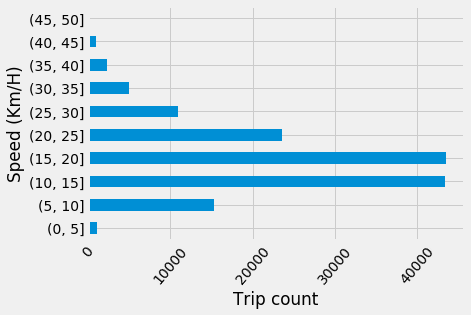

In [56]:
# Let's take a look at the speed range distribution 

df.speed.groupby(pd.cut(df.speed, np.arange(0,51,5))).count().plot(kind = 'barh')
plt.xlabel('Trip count')
plt.ylabel('Speed (Km/H)')
plt.xticks(rotation=50)
plt.show()

Mostly trips are done at a speed range of 10-20 km/h.


<a id='duration'></a>
## Trip Duration

In [57]:
df.trip_duration.describe()

count    146067.000000
mean          0.190875
std           0.115789
min           0.000833
25%           0.106111
50%           0.165000
75%           0.248750
max           0.749167
Name: trip_duration, dtype: float64

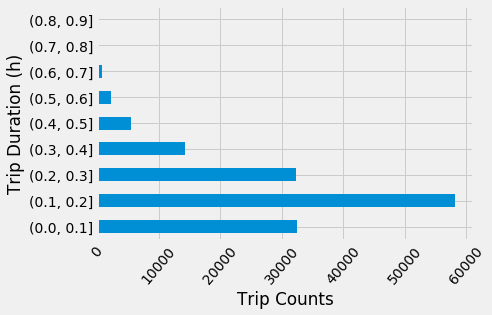

In [58]:
# Let's visualize the number of trips taken in slabs of 0-10, 20-30 ... hours respectively

df.trip_duration.groupby(pd.cut(df.trip_duration, np.arange(0,1,0.1))).count().plot(kind = 'barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (h)')
plt.xticks(rotation=50)
plt.show()

We can observe that most of the trips took 0.1 - 0.2 (h) to complete i.e. approx 6 - 12 min.


<a id='hour_trip'></a>
## Trips per Hour

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

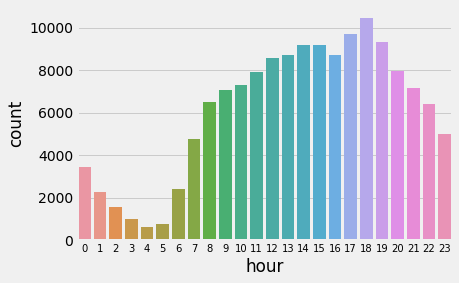

In [59]:
# Lets plot the pickup hour count 

sns.countplot(x="hour",data=df)
plt.xticks( fontsize = 10)

We can see that 
* There is a sudden rise in the pickup hours from 5AM and it continued till 8AM. This is may be due to early morning office hours
* Evening between 5PM and 7PM seem to be the busiest hours and that makes sense as this is the time when people return from their offices.

<a id='timeday_trip'></a>
## Trips per Time of Day

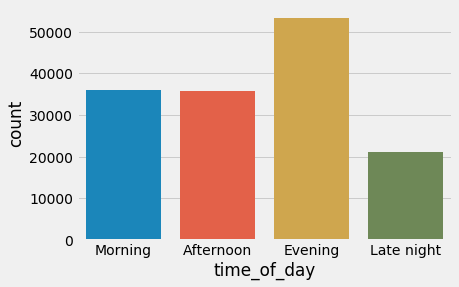

In [60]:
# Lets plot the pickup time of day and number of trips

sns.countplot(x="time_of_day",data=df,order=['Morning','Afternoon','Evening','Late night'])

As we see above, evenings are the busiest time of day.

<a id='day_trip'></a>
## Trips per Day

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

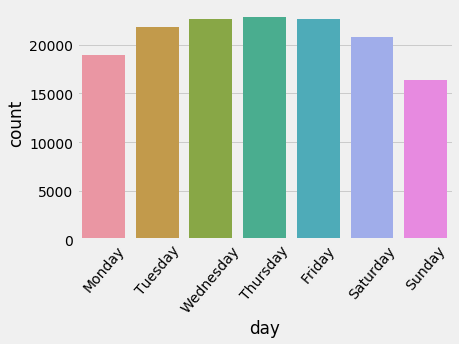

In [61]:
# Lets plot the pickup days count

sns.countplot(x="day",data=df)
plt.xticks(rotation=50)

We can clearly see that almost weekday seem to be the busiest days.

<a id='month_trip'></a>
## Trips per Month

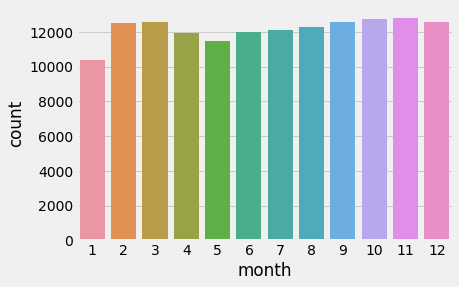

In [62]:
# Lets plot the number of pickup per month

sns.countplot(x="month",data=df)

- The usage of taxis decreases in January, which is expected as many people take trips outside the city during the New Year's holiday and do not commute to the office.
- A similar pattern is observed during the summer season due to high travel demand. 

<a id='year_trip'></a>
## Trips per Year

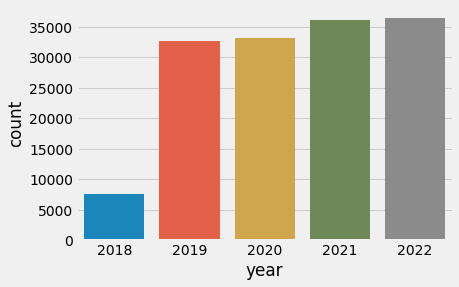

In [63]:
# Lets see the demand time(year) for airports

sns.countplot(x="year",data=df)

there is not much difference in taxi usage before and after Corona pandemic in the urban trips.

<a id='payment'></a>
##  Payment Type 

1    116201
2     29787
4        60
3        19
Name: payment_type, dtype: int64


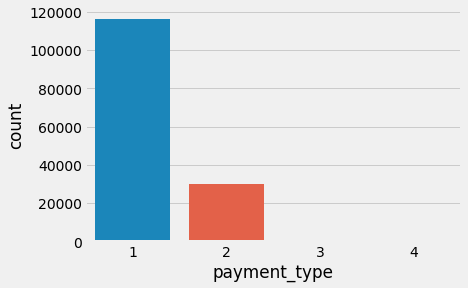

In [64]:
# Lets plot the payment type 

print(df.payment_type.value_counts())
sns.countplot(x='payment_type', data=df)


Based on the data dictionary we may have 6 type of peyment:
1. Credit card
2. Cash
3. No charge
4. Dispute
5. Unknown
6. Voided trip

We can see that passengers paid through the payment mode Credit card (1) more than any other payment mode. So giving promo offers in credit card payment may attract more passengers to travel.

<a id='amount'></a>
## Total Amount 

(0, 70)

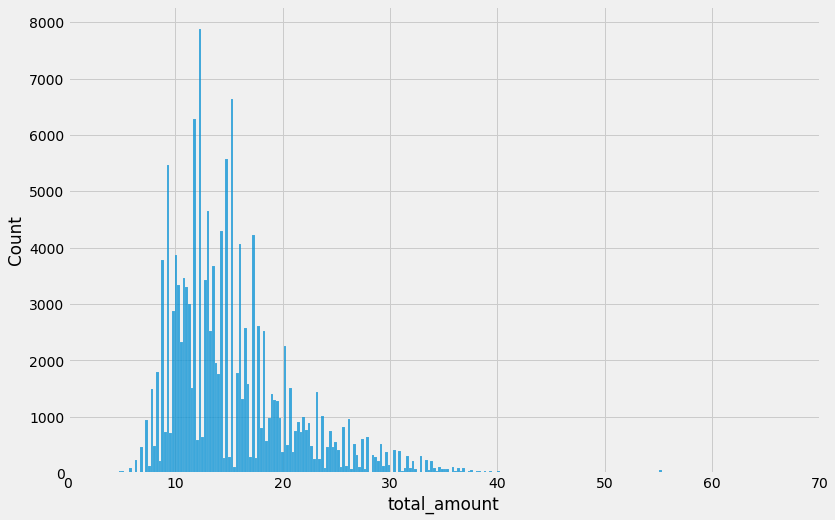

In [65]:
# Lets plot the total amount charged to passengers

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='total_amount')
plt.xlim(xmax= 70, xmin=0)

We can see people use taxi when the total amount is almost less than 17$. 

<a id='bivariate'></a>
# Bi variate Analysis


we will see the relationships between the individual features

<a id='hour_du_di'></a>
## Trip Duration, Trip Distance per Hour

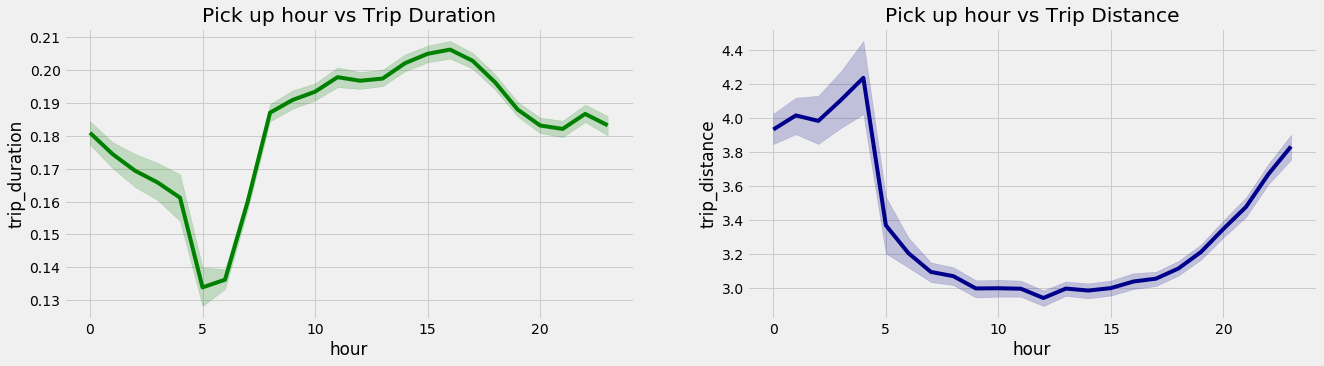

In [66]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pick up hour vs Trip Duration')
ax=sns.lineplot(x='hour',y='trip_duration',data=df,ax=ax1,color='g')

ax2.set_title('Pick up hour vs Trip Distance')
ax=sns.lineplot(x='hour',y='trip_distance',data=df,ax=ax2,color='darkblue')

- We see the trip duration is the maximum around 4 pm which may be because of traffic on the roads.
    Trip duration is the lowest around 6 am as streets may not be busy.
- We see the trip distance is the maximum around 4 am.This observation likely indicates that people embark on outstation trips, commencing their journeys early in the day.

<a id='timeday_du_di'></a>
## Trip Duration, Trip Distance per Time of Day

Text(0.5, 1.0, 'Trip Distance vs  Time of Day')

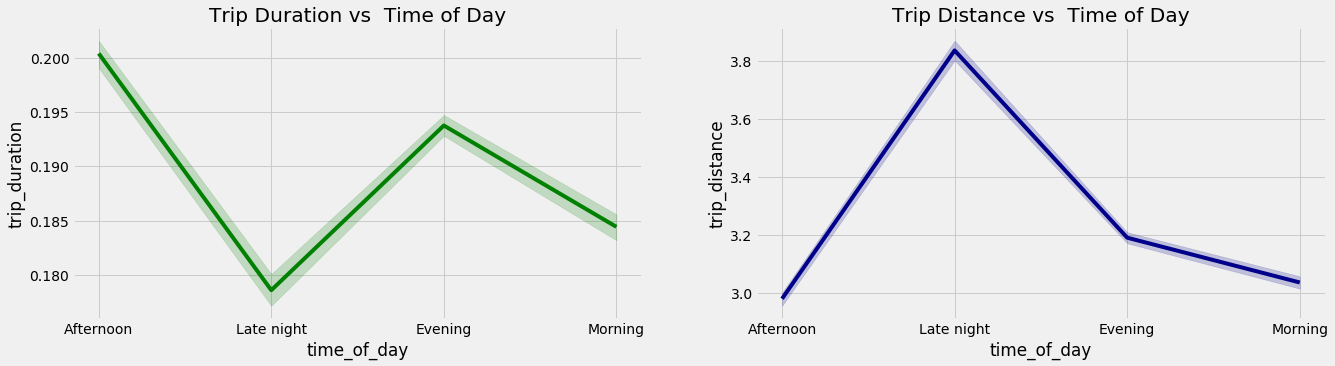

In [67]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax= sns.lineplot(x='time_of_day',y='trip_duration',data=df,ax=ax3,color='g')
ax3.set_title("Trip Duration vs  Time of Day")

ax= sns.lineplot(x='time_of_day',y='trip_distance',data=df,ax=ax4,color='darkblue')
ax4.set_title("Trip Distance vs  Time of Day")

As we see above, trip duration is the maximum in the afternoon and lowest between late night and morning.\
Distances being the longest during late night or it maybe called as early morning too.\
This can probably point to outstation trips where people start early for the day.

<a id='day_du_di'></a>
## Trip Duration, Trip Distance per Day

Text(0.5, 1.0, 'Trip Distance vs  Day of Week')

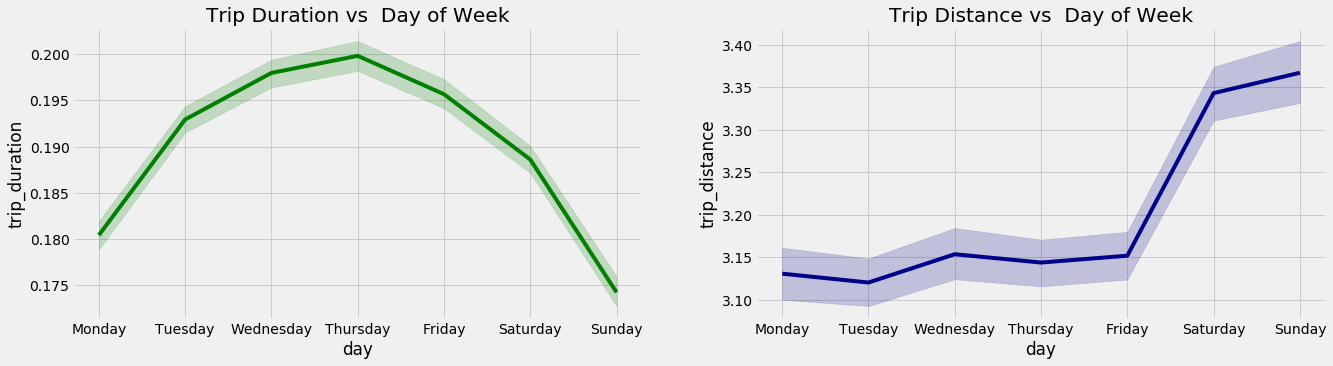

In [68]:
figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))

ax= sns.lineplot(x='day',y='trip_duration',data=df,ax=ax5,color='g')
ax5.set_title("Trip Duration vs  Day of Week")

ax= sns.lineplot(x='day',y='trip_distance',data=df,ax=ax6,color='darkblue')
ax6.set_title("Trip Distance vs  Day of Week")

- Trip duration is the longest on Thursdays.
- Distances are longer on Sundays probably because it’s weekend.


<a id='passenger_tip'></a>
## Passenger per Tip Amount  

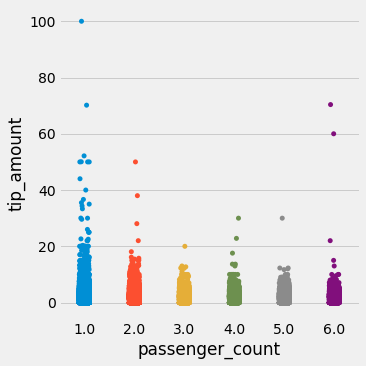

In [69]:
sns.catplot(x="passenger_count", y='tip_amount', data=df)

We can see the tip amount is high when passenger count in the trip is just one.it was clear because the most of taxi ride with 1 passenger

<a id='du_di'></a>
## Trip Duration and Distance

(-0.04896934703301515, 1)

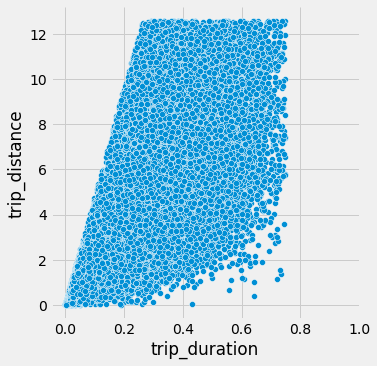

In [70]:
sns.relplot(y='trip_distance',x='trip_duration',data=df)
plt.xlim(xmax= 1)

There exists a direct relationship between the duration and distance of rides. This means that as the distance of a ride increases, the duration of the ride also tends to increase. Similarly, when the distance of a ride is shorter, the duration of the ride is typically shorter as well. This relationship can be attributed to various factors such as traffic conditions, speed limits, and route choices, where longer distances often require more time to travel.

<a id=corr></a>
# Correlation Analysis

In [71]:
# Lets generating the correlation matrix

dff = df[{'vendor_id', 'passenger_count', 'trip_distance', 'rate_code_id','store_and_fwd_flag', 'payment_type','tip_amount','total_amount', 'day', 'hour', 'month','year', 'trip_duration', }]
corr = dff.corr()

<a id=heatmap></a>
## Heatmap

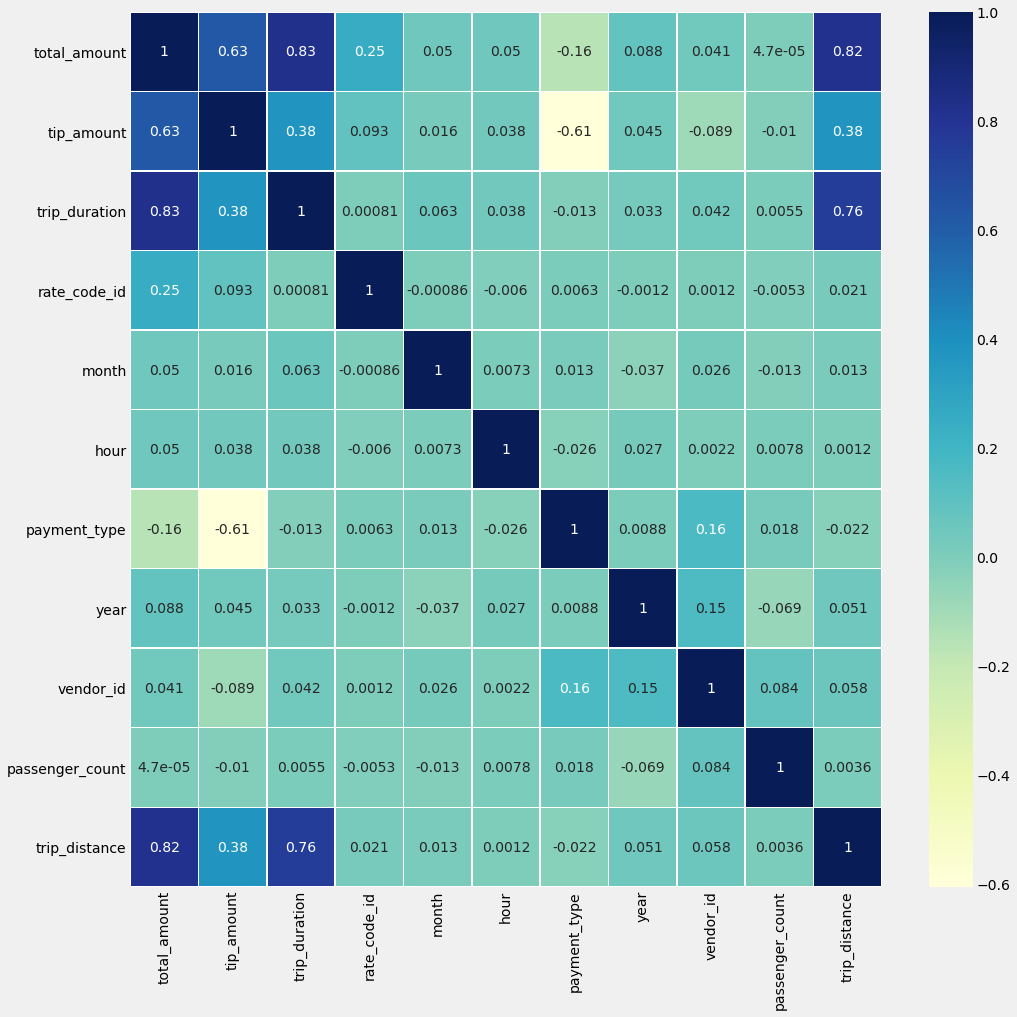

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.5);

most of the features shows there is no correlation.